### This is for handling the Missing values in a dataset

- **Missing Completely At Random (MCAR):**
    - A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other. Example: you have a data set on a piece of paper and you spill coffee on the paper destroying part of the data.
 
 
 
- **MAR (Missing At Random):**
    - Where the probability distribution of the pattern of missingness is functionally dependent upon the observable component in the record. **MCAR** is a special case of **MAR**. Example: you have a question on a survey asking if the survey participant is a drug addict and another question which asks if the survey participant has less than one alcoholic drink per year. Assume the answer to the alcoholic drink question is always observable, then the probability that someone fails to answer the drug addict question is most likely functionally dependent upon their answer to the alcoholic drink question. 
    
    
- **Missing Data Not At Random (MNAR) / Systematic Missing Values:**
    - Here there is some relationship between the data missing and any other values, observed or missing, within the dataset. Which is defined as the case which is NOT MAR. In the MNAR case, you can have situations where both the drug addict and alcoholic drink questions are absent in the same record. Another example, is a case where the question is: "What is your gender?" Suppose that females are less likely to answer this question than males. This is another example of an MNAR question because the probability that the answer is observable is conditionally dependent upon the unobservable component of the data record.
    
    

- **Strategies :**

1. We should never insert mean, mode, median, max, min or anything else for missing values. That is, avoid deterministic imputation even though it is widely used and available in most software packages. It underestimates and distorts the statistical regularities (e.g., underestimates variance is one example) present in the data sample.

2. If the data records are MCAR Then you can delete records with missing data.

3. If the data records are MCAR, then sometimes you can stochastically impute the missing values rather than deterministically impute them. So this means that if you specify the marginal probability distribution of a missing value as Gaussian with some known mean and some known variance then you can sample from that distribution to impute values into the data set. We need to be careful and do some additional research and analysis on data ,understand the business completely and take a judicious decision.

4. If the data is MAR then an algorithm such as Expectation Maximization can be used to handle the missing observations.

5. If the data is MNAR we can include binary indicators in the data record which explicitly identify when a variable is not observable. The challenge with this approach is that a highly nonlinear model needs to be designed to properly integrate this information in an appropriate manner. This might work in a machine learning algorithm where the binary indicators "disconnect" the influence of predictors which are not observable. Consequently, the MNAR theory (i.e., the theory of the joint distribution of the complete data record and missing data pattern) is instantiated in the learning machine's probabilistic model of its statistical environment.



- **Missing numeric data**
For missing numeric data, we should flag and fill the values.

    1. Flag the observation with an indicator variable of missingness.
    2. Secondly fill the original missing value with 0 just to meet the technical requirement of no missing values.

By using this technique of flagging and filling, we are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean.

- **Missing categorical data**
The best way to handle missing data for categorical features is to simply label them as ’Missing’!

    1. We are essentially adding a new class for the feature.
    2. This tells the algorithm that the value was missing.
    3. This also gets around the technical requirement for no missing values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mn

In [2]:
# reading the titanic dataset

df = pd.read_csv('http://bit.ly/kaggletrain', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# Number of null values in each column

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- As we can see there are only 2 null values in the **Embarked** column, so we can say that these 2 are **MCAR** type.

In [5]:
# Checking those 2 rows

df.loc[df['Embarked'].isnull(), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# Creating a column where null values are represented by 1

df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)
df['cabin_null']

PassengerId
1      1
2      0
3      1
4      0
5      1
      ..
887    1
888    0
889    1
890    0
891    1
Name: cabin_null, Length: 891, dtype: int32

In [7]:
# Now finding the percentage of cabins with a null value

per = df['cabin_null'].mean() * 100
print(f"The percentage of null values in the cabin is: {per:.2f}%")

The percentage of null values in the cabin is: 77.10%


### Now let's see if there any relationship between the survival and their cabin numbers:

- That is what is the percentage of people who survived with their cabin number is known or null

In [8]:
df.groupby('Survived')['cabin_null'].mean() * 100

Survived
0    87.613843
1    60.233918
Name: cabin_null, dtype: float64

#### So we can see that person whose cabin number was known had a greater chance of surviving.

### Techniques for handling the Missing data values

#### What is Imputation?

- In statistics, imputation is the process of replacing missing data with substituted values. When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation". Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.

<img src="https://editor.analyticsvidhya.com/uploads/63685Imputation.JPG">

#### Why Imputation is Important?

- **Incompatible with most of the Python libraries used in Machine Learning:** Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
- **Distortion in Dataset:** A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
- **Affects the Final Model:** the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.

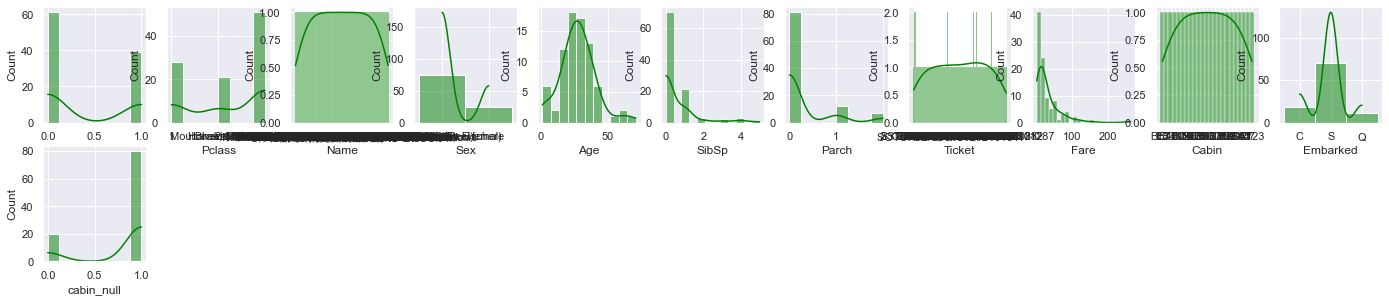

In [9]:
sns.set(rc={'figure.figsize':(24,20)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(8,11,i)
    p=sns.histplot(x=column, data=df.sample(100), stat='count', kde=True, color='green')

### Techniques are:

<img src="https://editor.analyticsvidhya.com/uploads/30381Imputation%20Techniques%20types.JPG">

**For more details follow the following link:**

https://www.kaggle.com/code/azminetoushikwasi/all-imputation-techniques-with-pros-and-cons

## 1. Mean/ Median /Mode imputation:

- **When should we apply?**

- **`Mean/Median imputation`** has the assumption that the data points are missing completely at random **(MCAR)**. We solve these data points by replacing the `NAN` with the most frequent occuring values.

In [10]:
# Loading the dataset

df1 = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Age','Fare','Survived'])
df1.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [11]:
## Lets go and see the percentage of missing values for each column

df1.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [12]:
# Let's see the mean value of the Age column

mean = df1.Age.mean()
mean

29.69911764705882

In [13]:
# Let's see the median value of the Age column

median = df1.Age.median()
median

28.0

In [14]:
# Creating a function to change the NaN values with the Median value
# This function will return a new column named Age_median 
# Now all the rows in Age column where we have a NaN value will be replaced by the median value of the Age column

def impute_nan(df1, variable, median):
    df1[variable+"_median"] = df1[variable].fillna(median)

In [15]:
# Using the function

impute_nan(df1,'Age',median)
df1.head(10)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [16]:
## Now let's find the standard deviation of both the columns

print(df1['Age'].std())
print(df1['Age_median'].std())

14.526497332334042
13.019696550973201


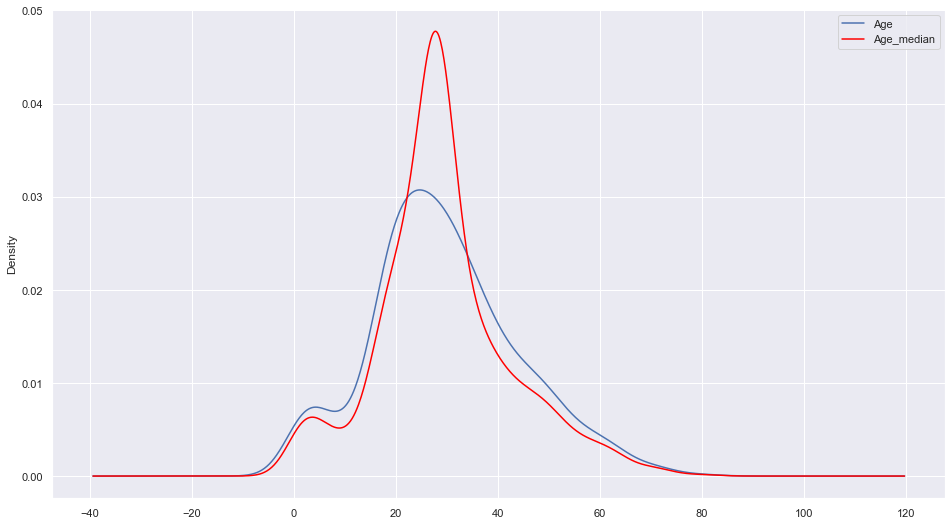

In [17]:
# Let's plot the two columns

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Let's try with mean

In [18]:
df2 = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Age','Fare','Survived'])
df2.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [19]:
# Let's see the mean value of the Age column

mean = df2.Age.mean()
mean

29.69911764705882

In [20]:
def impute_nan_mean(df1, variable, mean):
    df2[variable+"_mean"] = df2[variable].fillna(mean)

In [21]:
impute_nan_mean(df2,'Age',mean)
df2.head(10)

,Survived,Age,Fare,Age_mean
0,0,22.0,7.2500,22.000000
1,1,38.0,71.2833,38.000000
2,1,26.0,7.9250,26.000000
3,1,35.0,53.1000,35.000000
4,0,35.0,8.0500,35.000000
5,0,NaN,8.4583,29.699118
6,0,54.0,51.8625,54.000000
7,0,2.0,21.0750,2.000000
8,1,27.0,11.1333,27.000000
9,1,14.0,30.0708,14.000000


In [22]:
## Now let's find the standard deviation of both the columns

print(df2['Age'].std())
print(df2['Age_mean'].std())

14.526497332334042
13.002015226002882


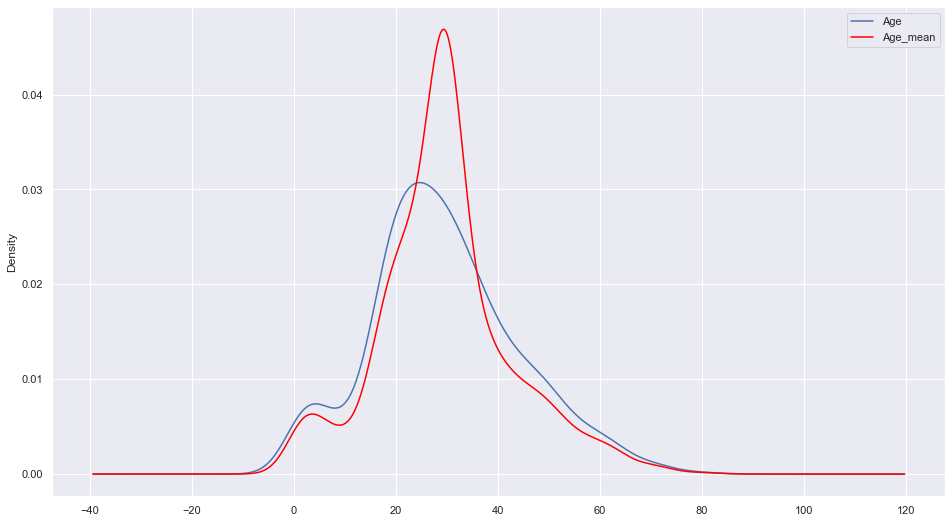

In [23]:
# Let's plot the two columns

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
df2['Age'].plot(kind='kde', ax=ax)
df2.Age_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages And Disadvantages of Mean/Median Imputation:

**Advantages**

    1. Easy to implement(Robust to outliers)    
    2. Faster way to obtain the complete dataset


**Disadvantages**

    1. Change or Distortion in the original variance
    2. Impacts Correlation

## 2. Random Sample Imputation

- **Aim:** Random sample imputation consists of taking random observation from the dataset. We use this observation to replace the nan values.


- **When should it be used?**

- It assumes that the data points are **Missing Completely At Random (MCAR)**

In [24]:
# loading the dataset

df3 = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
# As we know from earlier results that here only 'Age' column has null values.
# Let's find out number of null values it has.

df3['Age'].isnull().sum()

177

In [26]:
# So there is 177 null values are present in Age feature.
# Now, we replace this NaN by using Random Sample Imputation.

df3['Age'].dropna().sample()

767    30.5
Name: Age, dtype: float64

**- where `.dropna()` function drops all nan values in that feature the `.sample()` function returns any one random value**

In [27]:
df3['Age'].dropna().sample(df3['Age'].isnull().sum())

553    22.0
102    21.0
43      3.0
759    33.0
637    31.0
       ... 
473    23.0
608    22.0
657    32.0
708    22.0
789    46.0
Name: Age, Length: 177, dtype: float64

- This function check where is null values are present and replace Nan with random sample

In [28]:
# We use random_state because it replace NaN with specific value only .
# If we not use random_state then values change evrytime when we run .

df3['Age'].dropna().sample(df3['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [29]:
# to see the index of the null values

df3[df3['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

**Create A function which Replace NaN with Random Sample**

- Here we creating a two new features `Age_median` and `Age_random`.

- In `Age_median` replace NaN with Median and In `Age_random` replce NaN with Random Sample.

In [30]:
# Creating the function
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    
    # calculate random sample and store into random_sample
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # in random_sample_value all filled nan values are present now we want to merge this all filled values in our dataset
    # for this we want to match all nan values index in random_sample_values with df[variable_random] 
    # Pandas need to have same index in order to merge dataset
    # Finding index of the Nan values in the feature
    random_sample.index = df[df[variable].isnull()].index
    
    # now put a condition wherever it is null with loc function then replace with values of random_sample
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [31]:
# Calculate the median

median = df3['Age'].median()
median

28.0

In [32]:
# Calling the function

impute_nan(df3, 'Age', median)

In [33]:
# here the Age_random is created by using random sample imputation

df3.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


##### plot graph between Age, Age_median , Age_random

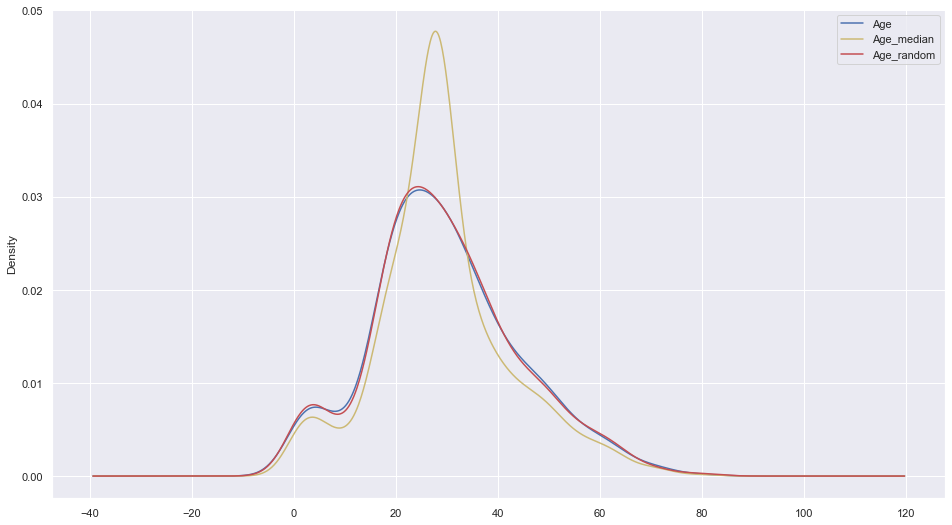

In [34]:
plt.figure(figsize=(16, 9))
df3.Age.plot(kind='kde', color='b')
df3.Age_median.plot(kind='kde', color='y')
df3.Age_random.plot(kind='kde', color='r')
plt.legend()

**Note:**

- From plot we can say that **Random Sample Imputation** work better than **Mean Median Mode imputation** in some cases.

- When we use Median to fillna there is Distortion.

- There is Less distortion in random sample.

- In every cases random sample imputation won't work.

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. In every situation randomness won't work

## 3. Capturing NAN values with a new feature

- It works well if the data points are not **Missing Data Not At Random (MNAR)**.

- In this method we create a new feature for NaN values where we set NaN=1 else 0.

- There is absolutely some relationship between the data misssing and any other feature's values in dataset.

- After creating mew feature then handle NaN values in old feature by using suitable method.

In [35]:
# Loading the dataset

df4 = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
# Checking NaN values

df4.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
# Checking mean of the null values

df4.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

<AxesSubplot:>

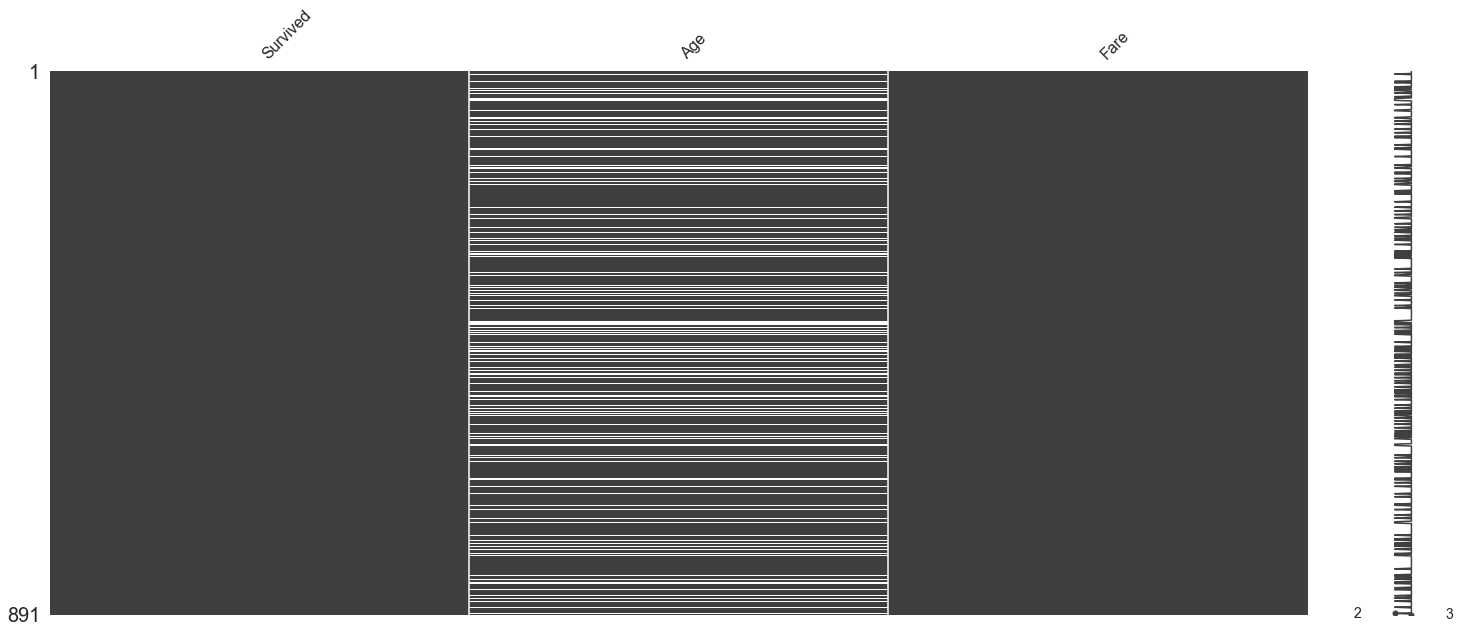

In [38]:
# Visualising the data with NaN values

mn.matrix(df4)

- There is 177 NaN values are present in Age feature it is approximately 20%.

In [39]:
# creating a new feature 'Age_NAN' 
# then replace wherever the Age is having a null value with 1 else replce it with 0.

df4['Age_NAN'] = np.where(df4['Age'].isnull(), 1, 0)
df4.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [40]:
# now replacing the NaN values in Age column with the median
# now wherever the value in Age_NAN coiumn is 1 then the value in Age column will be replaced with the median value.

df4['Age'].fillna(df4.Age.median(), inplace=True)
df4.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features **(Curse of Dimensionality)**

## 4. End of Distribution imputation

- In this method we replace missing values with far end values or extreme.
- **Far end value** means the values after **3rd standard deviation**.
- Here also we work with **MNAR**.

In [41]:
# Loading the dataset

df5 = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Age','Fare','Survived'])
df5.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


**Perform End of Distribution imputation**

<img src="https://i.ytimg.com/vi/iiRiOlkLa6A/maxresdefault.jpg">

In [42]:
# first find the mean of the Age column

mean = df5['Age'].mean()
mean

29.69911764705882

In [43]:
# now find the Standard Deviation

std = df5['Age'].std()
std

14.526497332334042

- Now we have a mean and standard deviation of Age feature, so now we find the **Far end values** or **extreme value**.
- Where extreme values means the values after **3rd standard deviation**.
- So **`extreme = (Mean of Age Feature + ( 3 * stander deviation of Age Feature))`**

In [44]:
# here is the far end value

extreme = (mean + (3*std))
extreme

73.27860964406094

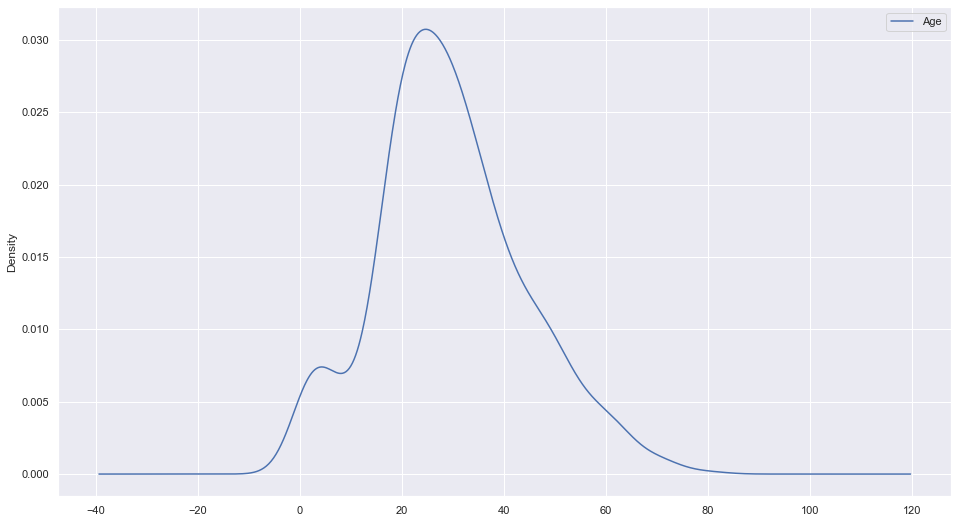

In [45]:
# let's use some plot for better understanding

plt.figure(figsize=(16, 9))
df5.Age.plot(kind='kde',color='b')
plt.legend()

<AxesSubplot:>

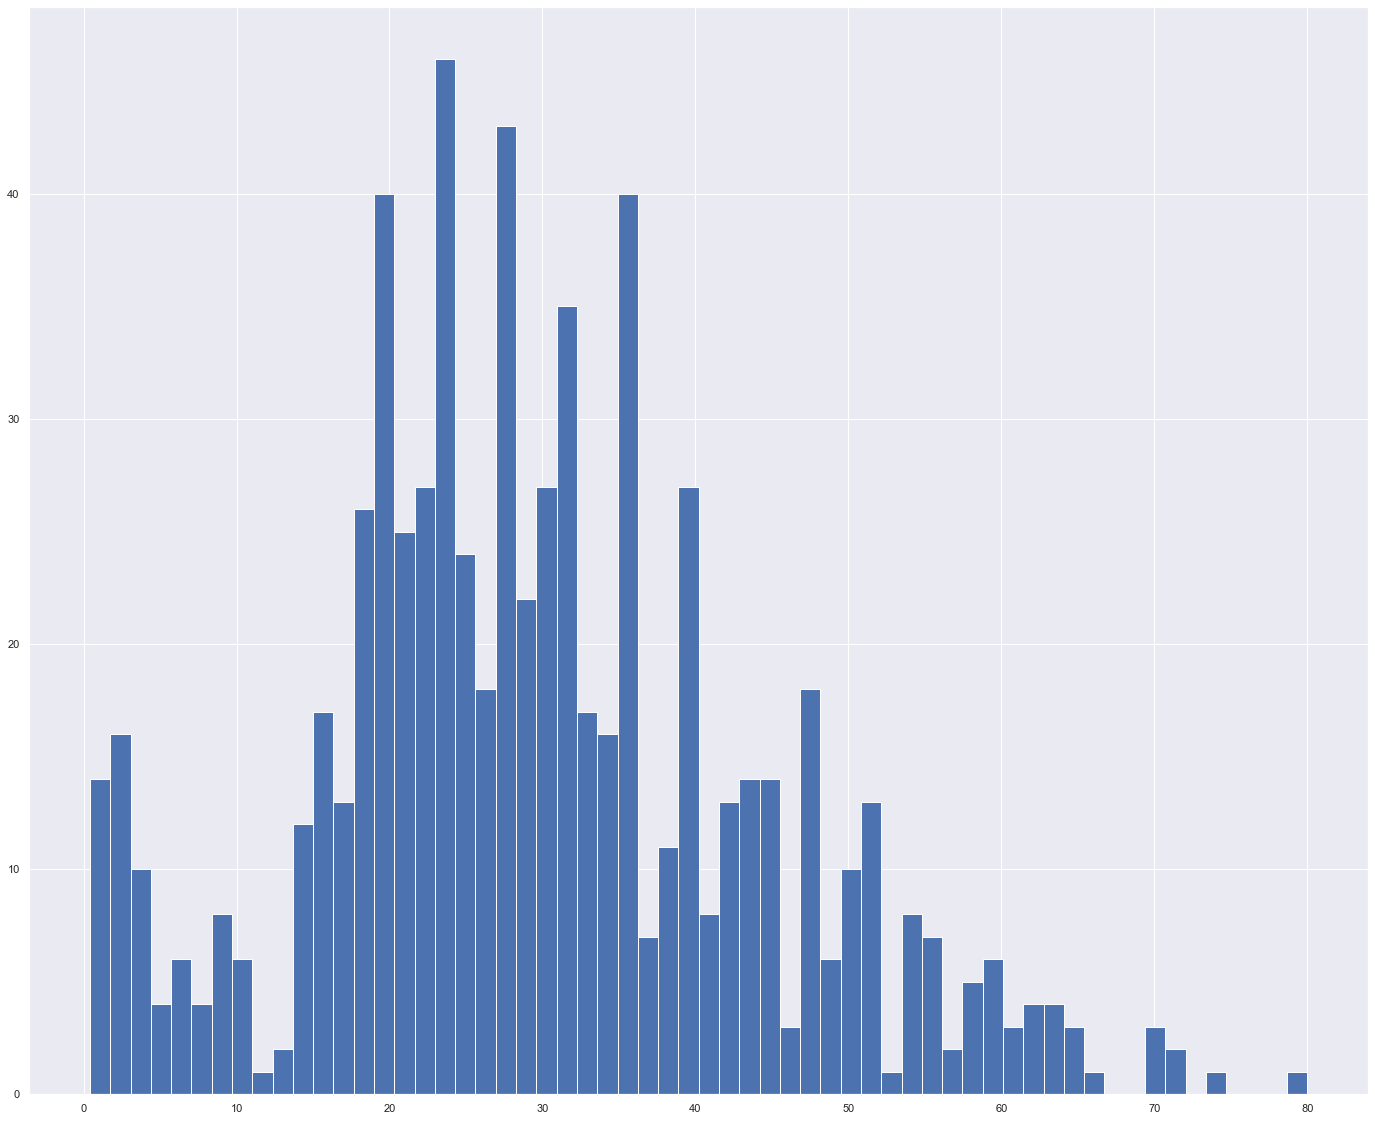

In [46]:
df5.Age.hist(bins=60)

<AxesSubplot:xlabel='Age'>

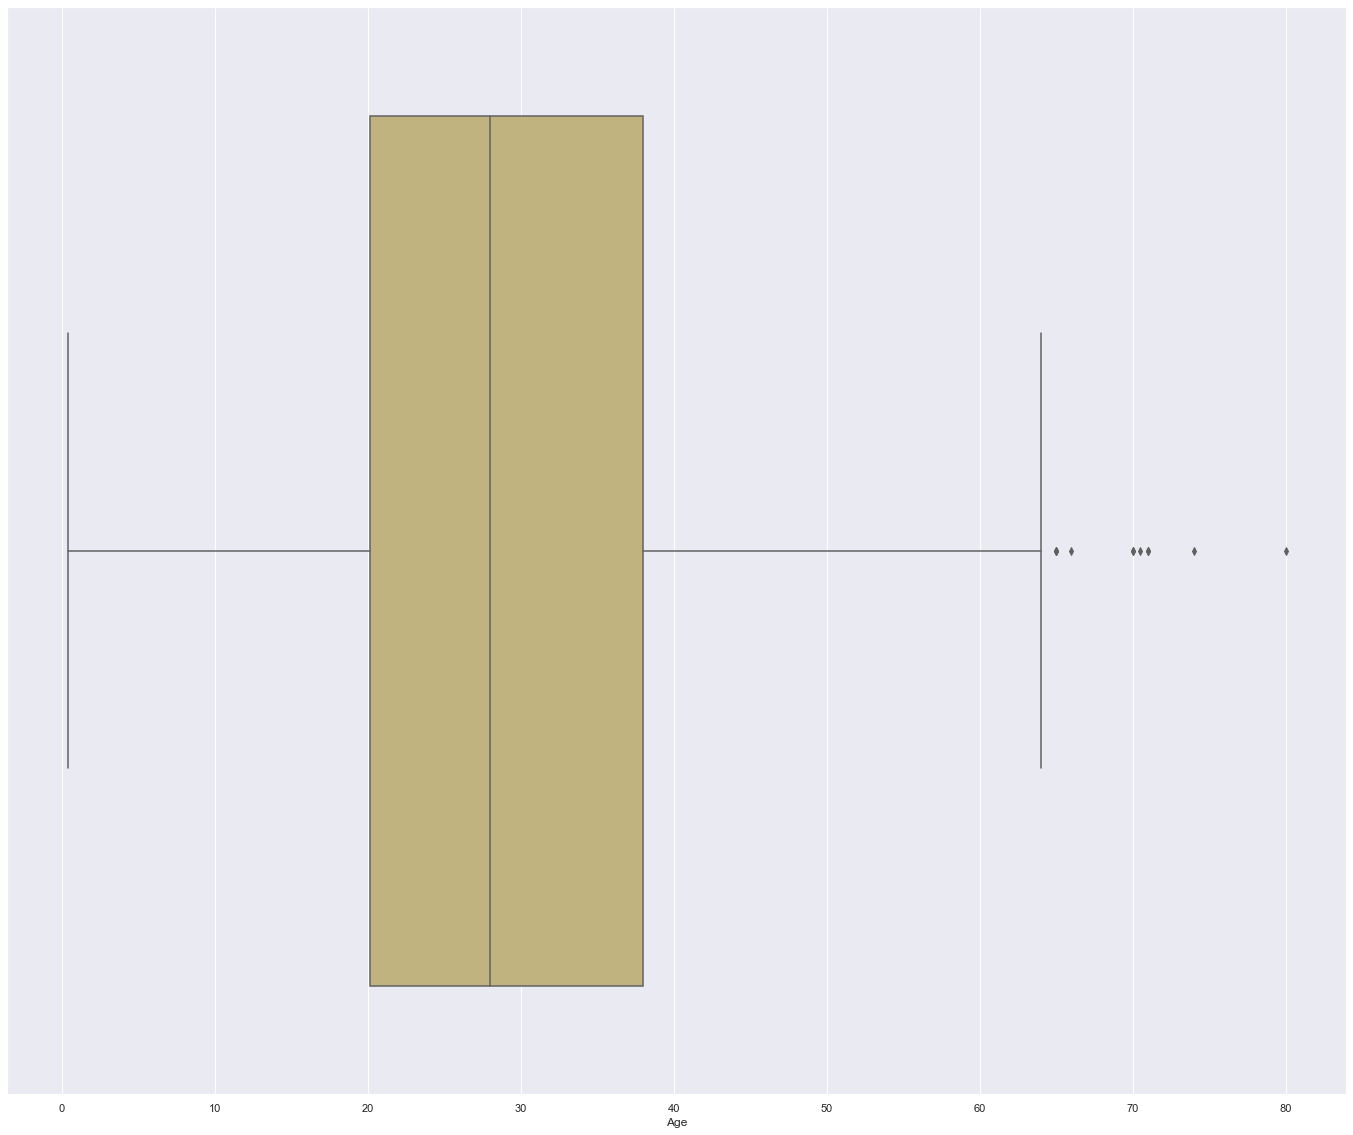

In [47]:
sns.boxplot(x='Age', data=df5, color='y')

- from both plots we can see that extreme values are between ~ 70 to 80 in other words it is a outlier.

###### Create a function to replace misssing values in Age with extreme values

In [48]:
def End_distribution(df, variable, extreme):
    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [49]:
# Calling the function

End_distribution(df5,'Age',extreme)
df5.head(10)

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861
6,0,54.0,51.8625,54.0,54.00000
7,0,2.0,21.0750,2.0,2.00000
8,1,27.0,11.1333,27.0,27.00000
9,1,14.0,30.0708,14.0,14.00000


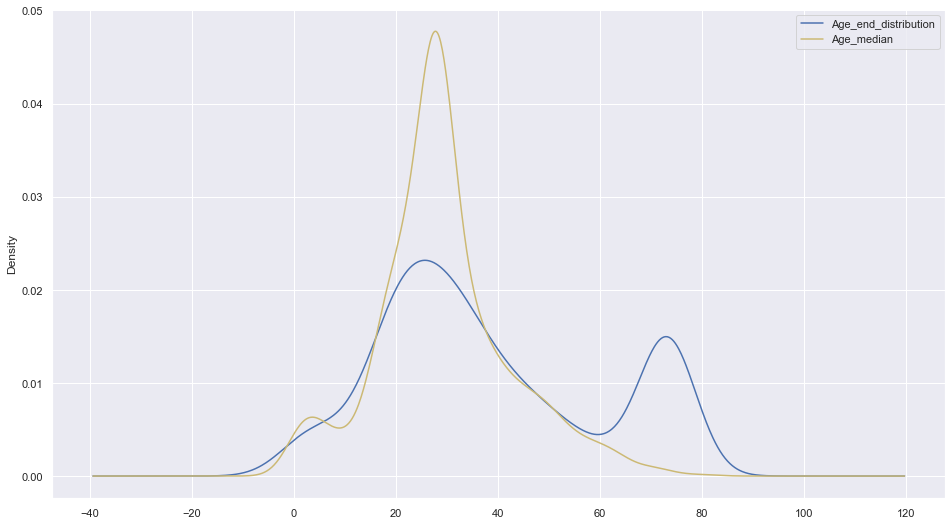

In [50]:
# let's again plot it

plt.figure(figsize=(16, 9))
df5.Age_end_distribution.plot(kind='kde', color='b')
df5.Age_median.plot(kind='kde', color='y')
plt.legend()

<AxesSubplot:>

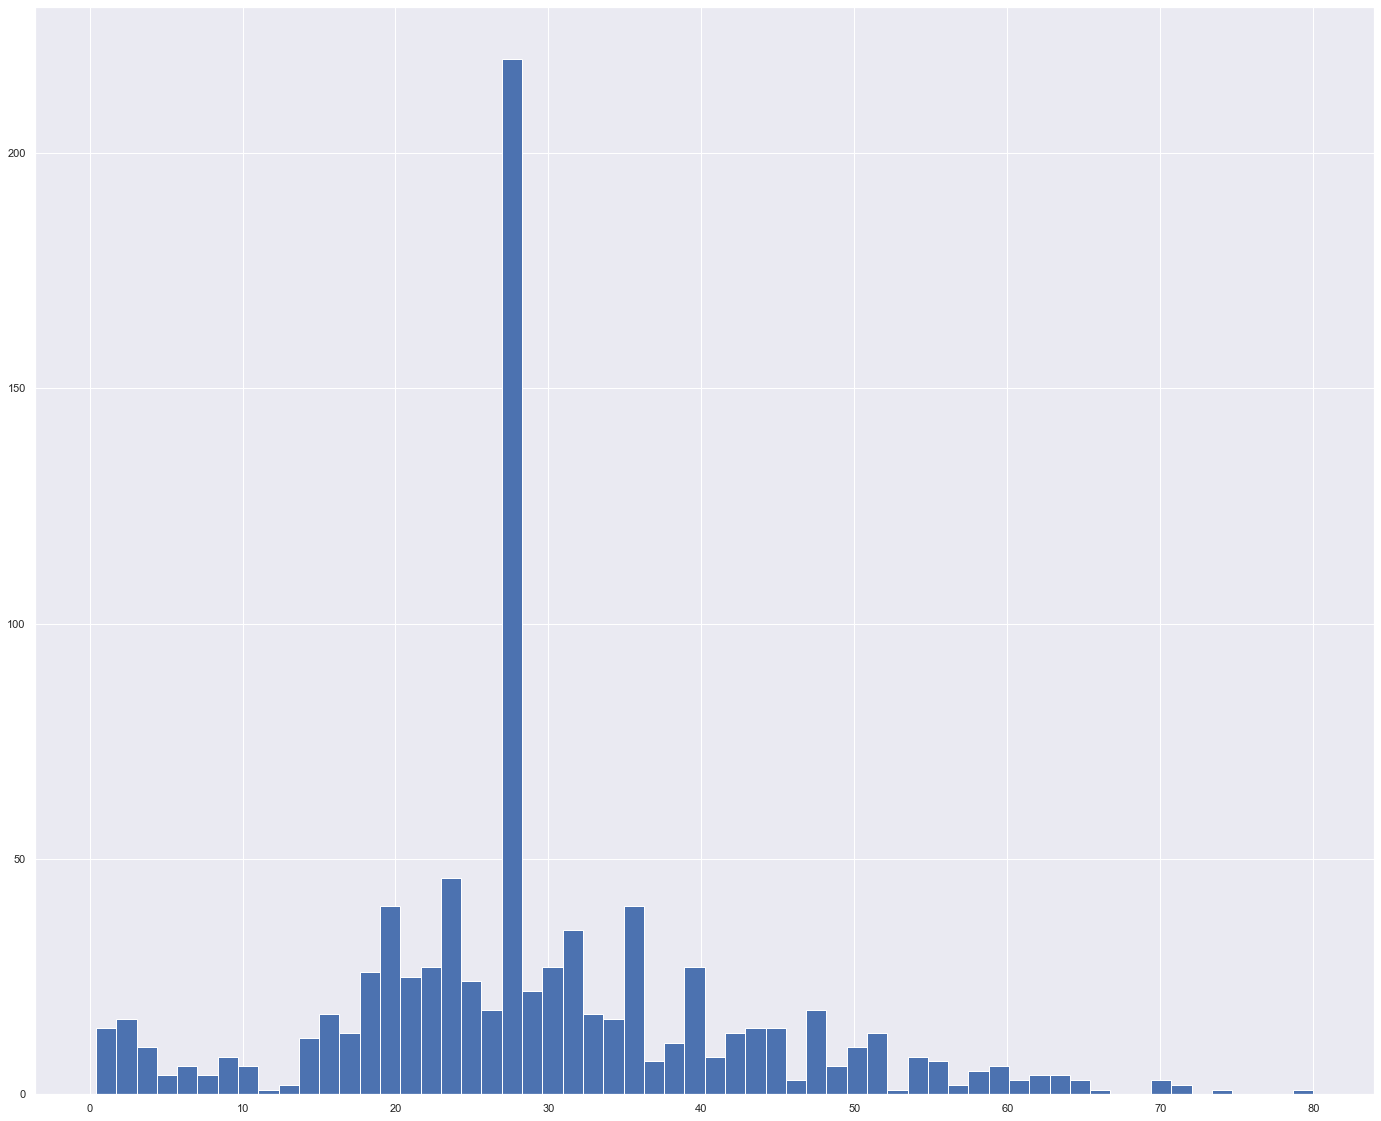

In [51]:
# now as all the NaN values are replaced with median so we are getting a variance around the 30 mark on x axis

df5.Age_median.hist(bins=60)

<AxesSubplot:>

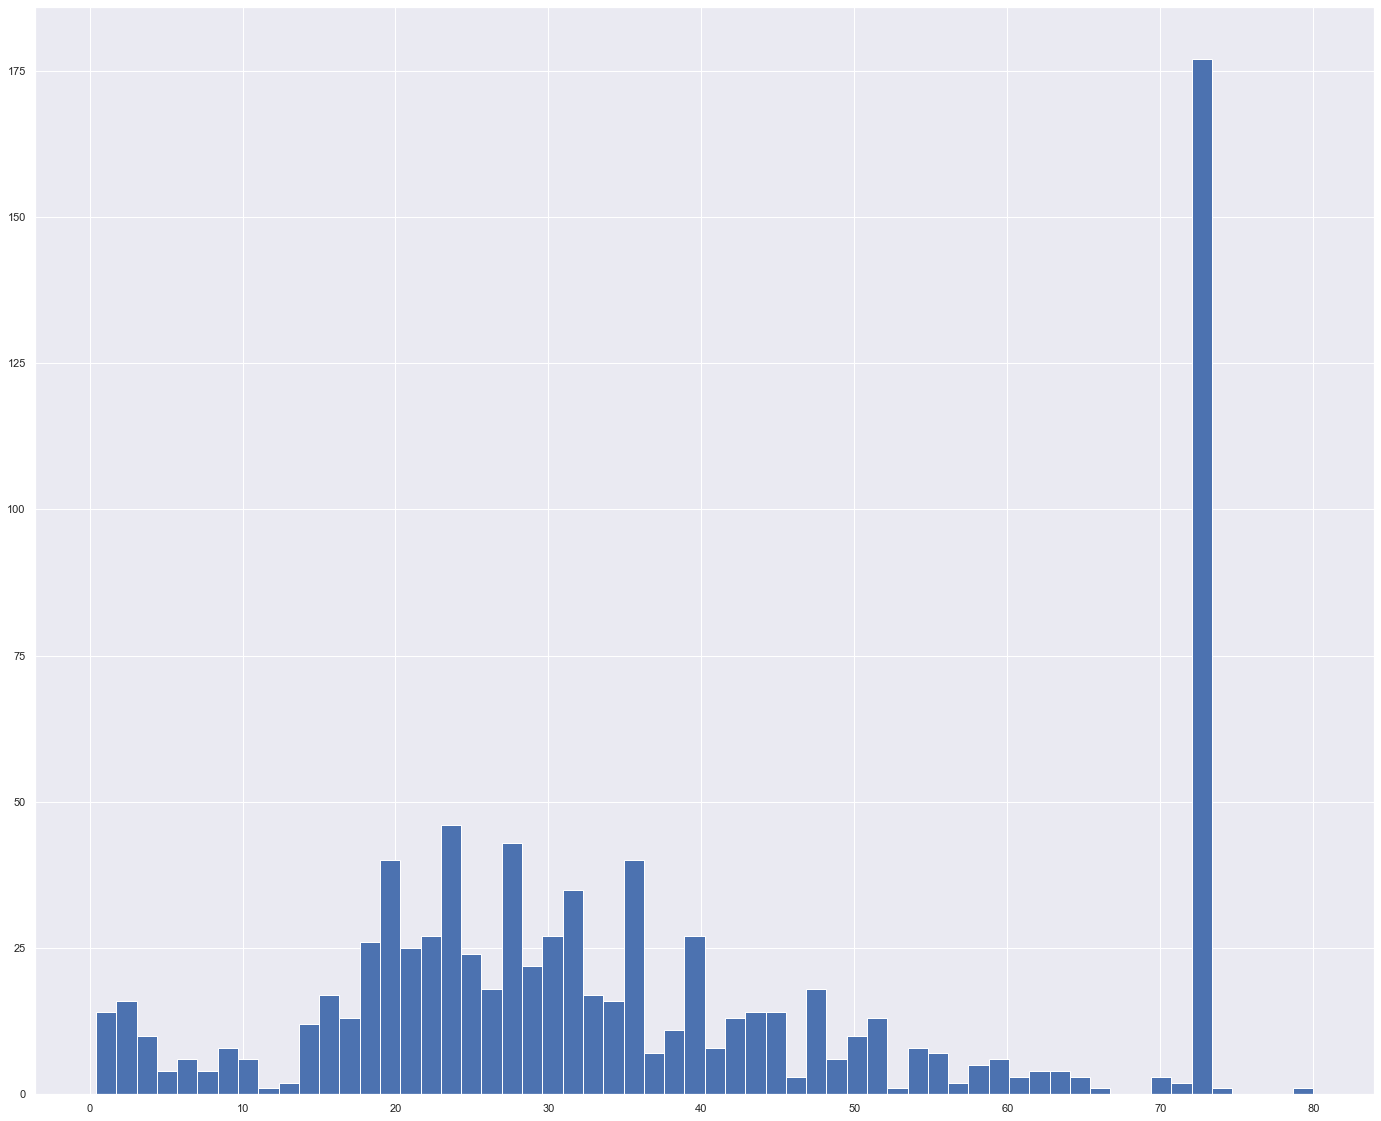

In [52]:
# now here all the NaN values are stored outside the distribution range. As here they are replaced with the extreme value.

df5.Age_end_distribution.hist(bins=60)

<AxesSubplot:xlabel='Age_end_distribution'>

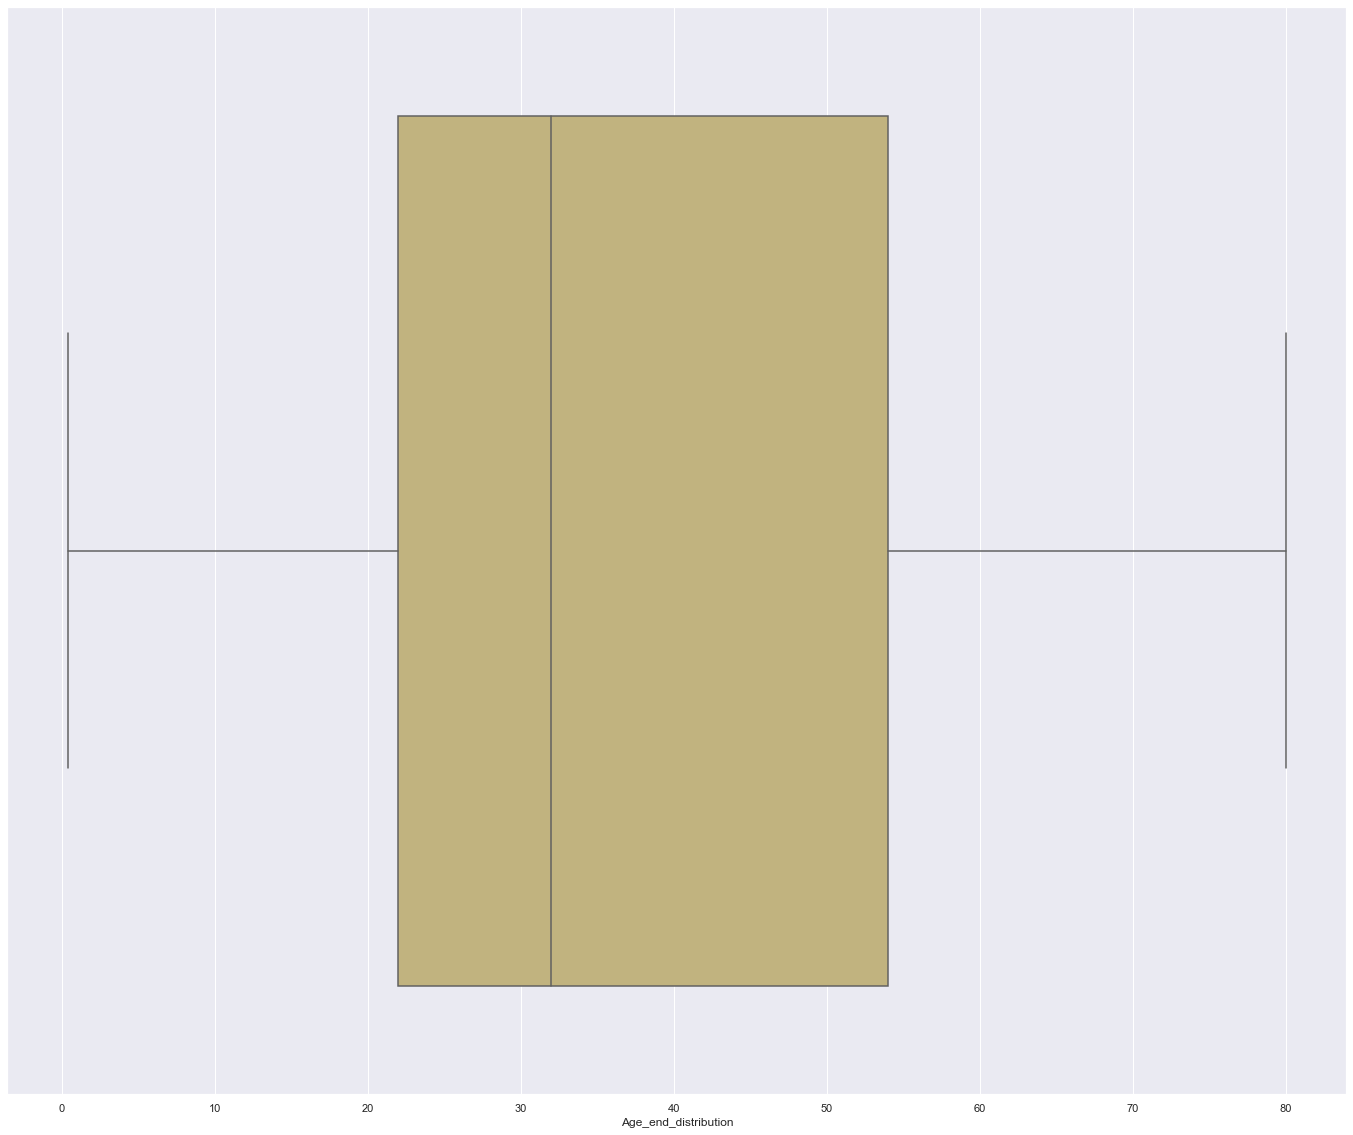

In [53]:
# Let's check the box plot

sns.boxplot(x='Age_end_distribution', data=df5, color='y')

- Now we can see that:

    - when we replace NaN with median then it shows distortion.
    - But it overcome when we replace NaN with End of Distribution and then the outlier is also covered.

**Advantages:**
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated into production (during model deployment)
4. Captures the importance of “missingness” if there is one

**Disadvantages:**
1. Distortion of the original variable distribution
2. Distortion of the original variance
3. Distortion of the covariance with the remaining variables of the dataset
4. This technique may mask true outliers in the distribution

## 5. Arbitrary Value Imputation

- This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. This technique states that we group the missing values in a column and assign them to a new value that is far away from the range of that column. Mostly we use values like `99999999` or `-9999999` or `“Missing”` or `“Not defined”` for numerical & categorical variables.

**Assumptions:-**
- Data is not Missing At Random.
- The missing data is imputed with an arbitrary value that is not part of the dataset or Mean/Median/Mode of data.


**When to Use:-**
- When data is **MNAR (Missing Not At Random)**.
- Suitable for All.

In [54]:
# Loading the dataset

df6 = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Age','Fare','Survived'])
df6.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


##### Creating the function for Arbitrary value

In [55]:
# Here we create 2 columns one where we replace the NaN values with 0 and in another replace them with 100

def arbitrary_impute(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

In [56]:
# calling the function

arbitrary_impute(df6, 'Age')
df6.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


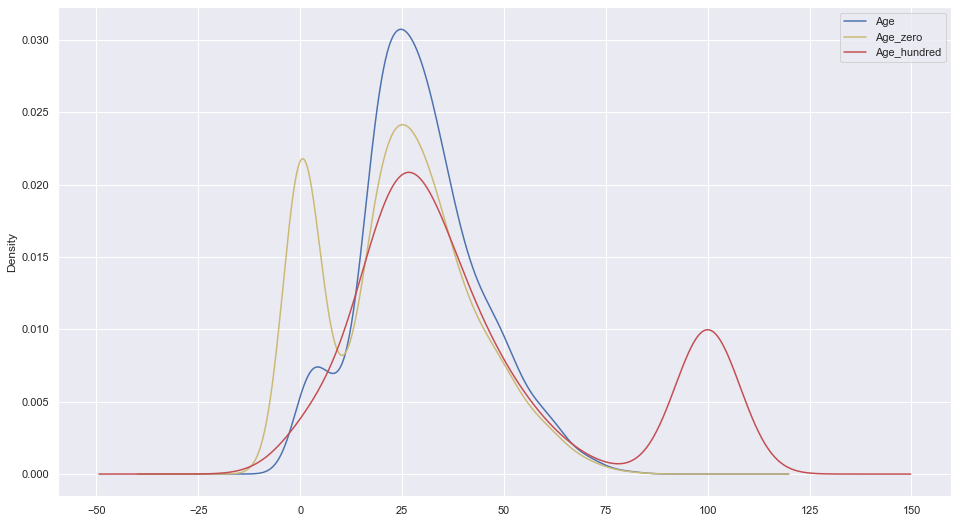

In [57]:
# let's plot a graph between these 3 columns

plt.figure(figsize=(16, 9))
df6.Age.plot(kind='kde', color='b')
df6.Age_zero.plot(kind='kde', color='y')
df6.Age_hundred.plot(kind='kde', color='r')
plt.legend()

**Advantages:-**
1. Easy to implement.
2. We can use it in production.
3. It retains the importance of “missing values” if it exists.


**Disadvantages:-**
1. Can distort original variable distribution.
2. Arbitrary values can create outliers.
3. Extra caution required in selecting the Arbitrary value.

## 6. Frequent Category/ Mode Imputation

- This technique says to replace the missing values in the variable with the highest frequency or in simple words replacing the values with the **Mode** of that column. This technique is also referred to as **Mode Imputation**.

**Assumptions:-**
- Data is missing at random **(MAR)**.
- Here is a high probability that the missing data looks like the majority of the data.

**When to Use:-**
- Data is **Missing at Random(MAR)**
- Missing data is not more than `5% – 6%` of the dataset.

In [58]:
df = pd.read_csv("F:\\Machine Learning\\INeuron_FSDS\\Practice EDA\\Dataset\\Students_Performance_mv.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [59]:
# Let's check about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
# Checking The Null Values and CalculateTotal Nullvalues of Dataset

df.isnull().sum()

gender                          0
race/ethnicity                 11
parental level of education    21
lunch                          12
test preparation course         4
math score                      0
reading score                   0
writing score                   0
dtype: int64

##### Let's Find what are the Unique Values, how many of ie. number of occurences of unique values, Find which one is most frequent on it in all the 4 categorical variables with NaN values.

**For `race/ethnicity` column**

In [61]:
# Find the unique Values in column 'race/ethnicity'

df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', nan, 'group E'],
      dtype=object)

In [62]:
# Calculate the value counts of each unique value

df['race/ethnicity'].value_counts()

group C    315
group D    261
group B    187
group E    138
group A     88
Name: race/ethnicity, dtype: int64

In [63]:
# Find the most Frequent value of  the feature.

df['race/ethnicity'].mode()

0    group C
Name: race/ethnicity, dtype: object

**For `parental level of education` column**

In [64]:
#Find the unique Values of column 'parental level of education'

df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [65]:
# Calculate the value counts of each unique value

df['parental level of education'].value_counts()

associate's degree    219
some college          218
high school           193
some high school      174
bachelor's degree     116
master's degree        59
Name: parental level of education, dtype: int64

In [66]:
# Find the most Frequent value of  the feature.

df['parental level of education'].mode()

0    associate's degree
Name: parental level of education, dtype: object

**For `lunch` column**

In [67]:
#Find the unique Values of column 'parental level of education'

df['lunch'].unique()

array(['standard', 'free/reduced', nan], dtype=object)

In [68]:
# Calculate the value counts of each unique value

df['lunch'].value_counts()

standard        637
free/reduced    351
Name: lunch, dtype: int64

In [69]:
# Find the most Frequent value of  the feature.

df['lunch'].mode()

0    standard
Name: lunch, dtype: object

**For `test preparation course` column**

In [70]:
#Find the unique Values of column 'parental level of education'

df['test preparation course'].unique()

array(['none', 'completed', nan], dtype=object)

In [71]:
# Calculate the value counts of each unique value

df['test preparation course'].value_counts()

none         639
completed    357
Name: test preparation course, dtype: int64

In [72]:
# Find the most Frequent value of  the feature.

df['test preparation course'].mode()

0    none
Name: test preparation course, dtype: object

**Now replace the Missing Values by Most Frequent category using fillna() Function.**

In [73]:
df['race/ethnicity'] = df['race/ethnicity'].fillna(value=df['race/ethnicity'].mode()[0])

df['parental level of education'] = df['parental level of education'].fillna(value=df['parental level of education'].mode()[0])

df['lunch'] = df['lunch'].fillna(value=df['lunch'].mode()[0])

df['test preparation course'] = df['test preparation course'].fillna(value=df['test preparation course'].mode()[0])

In [74]:
# Now checking again for null values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [75]:
# Checking the dataset again

df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**Advantages:-**
1. Implementation is easy.
2. We can obtain a complete dataset in very little time. i.e. it is very fast.
3. We can use this technique in the production model.

**Disadvantages:-**
1. The higher the percentage of missing values, the higher will be the distortion.
2. May lead to over-representation of a particular category.
3. Can distort original variable distribution.

## 7. Complete Case Analysis Imputation

- This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data i.e we consider those rows where we have a missing data column and then directly removes the rows that have missing data 
- So here we consider only those rows where we have complete data i.e data is not missing.

**Assumptions:-**
- Data is missing at random **(MAR)**.
- Missing data is completely removed from the table.

**When to Use:-**
- Data is **Missing at Random(MAR)**
- Good for Mixed, Numerical, and Categorical data.
- Missing data is not more than `5% – 6%` of the dataset.

In [76]:
# Loading the dataset

df = pd.read_csv("F:\\Machine Learning\\INeuron_FSDS\\Practice EDA\\Dataset\\Wine_Quality.csv")
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [77]:
# Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [78]:
# Checking The Null Values and CalculateTotal Nullvalues of Dataset

df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [79]:
# Cheking Shape of the Dataset

df.shape

(6497, 13)

In [80]:
# Calculate the Percentage of Null Values.

(df.isnull().sum()/df.shape[0])*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

- Here the NaN missing Values percentages are very low.
- We can drop if the percentage of missing value is 5-6%

In [81]:
df1 = df.dropna(axis=0)

In [82]:
# let's check for null values again

df1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [83]:
# Shape of the Data Set After Removing Null Values

df1.shape

(6463, 13)

##### Calculating the Standard Deviation Before and After imputation

In [84]:
# Before

df['volatile acidity'].std()

0.16464902864429282

In [85]:
# After

df1['volatile acidity'].std()

0.16463923980300074

##### let's check the distribution of a few variables before and after

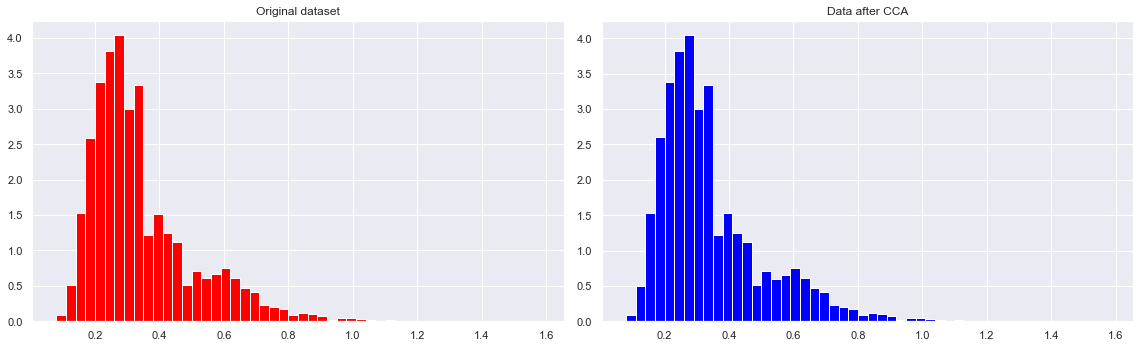

In [98]:
# Histogram

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['volatile acidity'].hist(bins=50, density=True, color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df1['volatile acidity'].hist(bins=50, density=True, color='blue')
plt.title("Data after CCA")
plt.tight_layout()

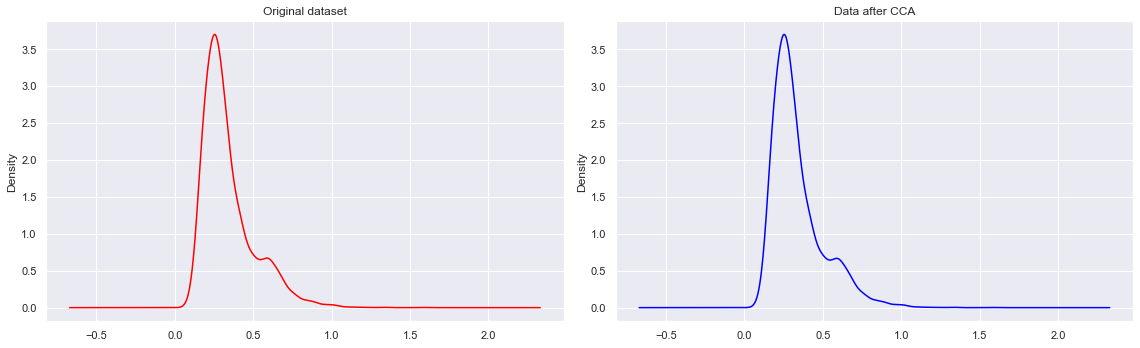

In [99]:
# Density plot

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
df['volatile acidity'].plot.density(color='red')
plt.title("Original dataset")
plt.subplot(1,2,2)
df1['volatile acidity'].plot.density(color='blue')
plt.title("Data after CCA")
plt.tight_layout()

**Note: There is no major Difference before and after drop the missing Value.**